# Classification

In [34]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers

tf.__version__

'2.7.1'

In [35]:
df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
print(df) # Ausgabe 

C:\Users\Jerma\AppData\Local\Temp\ipykernel_29632\814460106.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
C:\Users\Jerma\AppData\Local\Temp\ipykernel_29632\814460106.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expec

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558806  2015     Kia                 K900       Luxury      Sedan   
558807  2012     Ram                 2500  Power Wagon   Crew Cab   
558808  2012     BMW                   X5    xDrive35d        SUV   
558809  2015  Nissan               Altima        2.5 S      sedan   
558810  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0   white   
1         automat

In [36]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [38]:
# To find the number of duplicate rows

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 16)


In [39]:
#Fehlende Werte erkennen. Gibt ein boolesches Objekt zurück, das angibt, ob die Werte NA sind 
df.isna().sum().sort_values(ascending=False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
year                0
vin                 0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [40]:
#  To Drop the missing or null values
print(df.isnull().sum())     # Finding the number of Null values

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64


In [41]:
df = df.dropna()    # Dropping the missing values.
df.count()

year            472336
make            472336
model           472336
trim            472336
body            472336
transmission    472336
vin             472336
state           472336
condition       472336
odometer        472336
color           472336
interior        472336
seller          472336
mmr             472336
sellingprice    472336
saledate        472336
dtype: int64

In [42]:
print(df.isnull().sum())   # After dropping the values

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


In [43]:
categorical_columns = []
continous_columns = []
discrete_columns = []

for x in df.columns:
  if df[x].dtypes == 'O':
    categorical_columns.append(x)
  else:
    if df[x].nunique()>20:
      continous_columns.append(x)
    else:
      discrete_columns.append(x)

In [44]:
categorical_columns

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'vin',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

Define label

In [45]:
y_label = 'sellingprice'

In [46]:
# Make a dictionary with int64 featureumns as keys and np.int32 as values
int_32 = dict.fromkeys(df.select_dtypes(np.int64).columns, np.int32)
# Change all columns from dictionary
df = df.astype(int_32)

# Make a dictionary with float64 columns as keys and np.float32 as values
float_32 = dict.fromkeys(df.select_dtypes(np.float64).columns, np.float32)
df = df.astype(float_32)

In [47]:
int_32


{'year': numpy.int32, 'mmr': numpy.int32, 'sellingprice': numpy.int32}

In [48]:
# Convert to numeric

# make a list of all categorical variables
cat_convert = ['year', 'condition', 'odometer', 'mmr']

# convert variables
for i in cat_convert:
    df[i] = df[i].astype("int")

In [49]:
# Make list of all numerical data (except label)
list_num = df.drop(columns=[y_label]).select_dtypes(include=[np.number]).columns.tolist()

# Make list of all categorical data which is stored as integers (except label)
list_cat_int = df.drop(columns=[y_label]).select_dtypes(include=['category']).columns.tolist()

# Make list of all categorical data which is stored as string (except label)
list_cat_string = df.drop(columns=[y_label]).select_dtypes(include=['string']).columns.tolist()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472336 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          472336 non-null  int32 
 1   make          472336 non-null  object
 2   model         472336 non-null  object
 3   trim          472336 non-null  object
 4   body          472336 non-null  object
 5   transmission  472336 non-null  object
 6   vin           472336 non-null  object
 7   state         472336 non-null  object
 8   condition     472336 non-null  int32 
 9   odometer      472336 non-null  int32 
 10  color         472336 non-null  object
 11  interior      472336 non-null  object
 12  seller        472336 non-null  object
 13  mmr           472336 non-null  int32 
 14  sellingprice  472336 non-null  int32 
 15  saledate      472336 non-null  object
dtypes: int32(5), object(11)
memory usage: 52.3+ MB


Data splitting

In [51]:
# Make validation data
df_val = df.sample(frac=0.2, random_state=1337)

# Create training data
df_train = df.drop(df_val.index)

In [52]:
# Save training data
df_train.to_csv("df_train.csv", index=False)

In [53]:
print(
    "Using %d samples for training and %d for validation"
    % (len(df_train), len(df_val))
)

Using 377869 samples for training and 94467 for validation


Transform to Tensors

In [54]:
# Define a function to create our tensors

def dataframe_to_dataset(dataframe, shuffle=True, batch_size=32):
    df = dataframe.copy()
    labels = df.pop(y_label)
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    df = ds.prefetch(batch_size)
    return ds

In [55]:
batch_size = 32

ds_train = dataframe_to_dataset(df_train, shuffle=True, batch_size=batch_size)
ds_val = dataframe_to_dataset(df_val, shuffle=True, batch_size=batch_size)

Numerical preprocessing function

In [56]:
# Define numerical preprocessing function
def get_normalization_layer(name, dataset):
    
    # Create a Normalization layer for our feature
    normalizer = layers.Normalization(axis=None)

    # Prepare a dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    return normalizer

Categorical preprocessing functions

In [57]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  
  # Create a layer that turns strings into integer indices.
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  # Otherwise, create a layer that turns integer values into integer indices.
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a `tf.data.Dataset` that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Encode the integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply multi-hot encoding to the indices. The lambda function captures the
  # layer, so you can use them, or include them in the Keras Functional model later.
  return lambda feature: encoder(index(feature))

Data preprocessing

In [58]:
all_inputs = []
encoded_features = []

Numerical preprocessing

In [59]:
# Numerical features
for feature in list_num:
  numeric_feature = tf.keras.Input(shape=(1,), name=feature)
  normalization_layer = get_normalization_layer(feature, ds_train)
  encoded_numeric_feature = normalization_layer(numeric_feature)
  all_inputs.append(numeric_feature)
  encoded_features.append(encoded_numeric_feature)

Categorical preprocessing

In [60]:
for feature in list_cat_int:
  categorical_feature = tf.keras.Input(shape=(1,), name=feature, dtype='int32')
  encoding_layer = get_category_encoding_layer(name=feature,
                                               dataset=ds_train,
                                               dtype='int32',
                                               max_tokens=5)
  encoded_categorical_feature = encoding_layer(categorical_feature)
  all_inputs.append(categorical_feature)
  encoded_features.append(encoded_categorical_feature)

In [61]:
for feature in list_cat_string:
  categorical_feature = tf.keras.Input(shape=(1,), name=feature, dtype='string')
  encoding_layer = get_category_encoding_layer(name=feature,
                                               dataset=ds_train,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_feature = encoding_layer(categorical_feature)
  all_inputs.append(categorical_feature)
  encoded_features.append(encoded_categorical_feature)

Model

In [62]:
# Input
all_features = layers.concatenate(encoded_features)

# First layer
x = layers.Dense(32, activation="relu")(all_features)

# Dropout to prevent overvitting
x = layers.Dropout(0.5)(x)

# Output layer
output = layers.Dense(1, activation="sigmoid")(x)

# Group all layers 
model = tf.keras.Model(all_inputs, output)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [63]:
# model.compile(optimizer="adam", 
#               loss ="binary_crossentropy", 
#               metrics=["accuracy"])

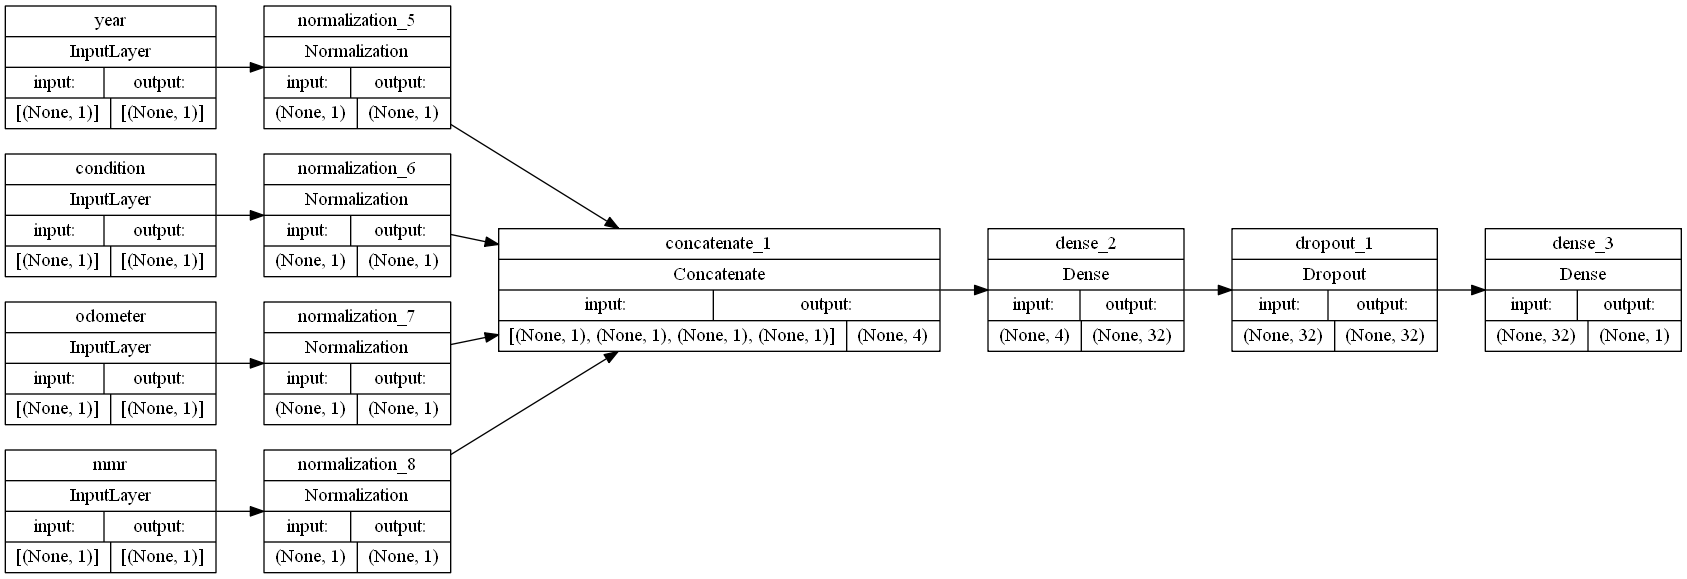

In [64]:
# `rankdir='LR'` is to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472336 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          472336 non-null  int32 
 1   make          472336 non-null  object
 2   model         472336 non-null  object
 3   trim          472336 non-null  object
 4   body          472336 non-null  object
 5   transmission  472336 non-null  object
 6   vin           472336 non-null  object
 7   state         472336 non-null  object
 8   condition     472336 non-null  int32 
 9   odometer      472336 non-null  int32 
 10  color         472336 non-null  object
 11  interior      472336 non-null  object
 12  seller        472336 non-null  object
 13  mmr           472336 non-null  int32 
 14  sellingprice  472336 non-null  int32 
 15  saledate      472336 non-null  object
dtypes: int32(5), object(11)
memory usage: 68.4+ MB


In [66]:
%%time
model.fit(ds_train, epochs=10, validation_data=ds_val)

Epoch 1/10


c:\Users\Jerma\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py:559: UserWarning: Input dict contained keys ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


11809/11809 [==============================] - 56s 4ms/step - loss: -60236968.0000 - accuracy: 5.2928e-06 - val_loss: -165083168.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
11809/11809 [==============================] - 58s 5ms/step - loss: -357960032.0000 - accuracy: 5.2928e-06 - val_loss: -584527552.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
11809/11809 [==============================] - 53s 4ms/step - loss: -904861952.0000 - accuracy: 5.2928e-06 - val_loss: -1247565312.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
11809/11809 [==============================] - 61s 5ms/step - loss: -1694651008.0000 - accuracy: 5.2928e-06 - val_loss: -2149872896.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
11809/11809 [==============================] - 55s 4ms/step - loss: -2729165824.0000 - accuracy: 5.2928e-06 - val_loss: -3291284480.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
11809/11809 [==============================] - 59s 5ms/step - loss: -4005803008.0000 - accuracy: 5.2928e-06 - val_loss: -4671780352

In [ ]:
loss, mean_squared_error = model.evaluate(ds_val)

print("mean_squared_error", round(mean_squared_error, 2))

In [67]:
loss, accuracy = model.evaluate(ds_val)

print("Accuracy", round(accuracy, 2))

2953/2953 [==============================] - 12s 4ms/step - loss: -12555608064.0000 - accuracy: 0.0000e+00
Accuracy 0.0


Perform inference

In [68]:
model.save('my_hd_classifier')

INFO:tensorflow:Assets written to: my_hd_classifier\assets


In [69]:
reloaded_model = tf.keras.models.load_model('my_hd_classifier')

In [70]:
sample = {
    "year": 2017,
    "make": "BMW",
    "model": "3 Series",
    "trim": "328i SULEV",
    "body": "sedan",
    "transmission": "automatic",
    "vin": "wba3c1c51ek116351",
    "state": "ca",
    "condition": 5.0,
    "odometer": 1300
}